In [46]:
import pandas as pd
import os, shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

# Working with Image Data

In [2]:
data_normal_dir = '/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/NORMAL'
data_pneumonia_dir = '/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/PNEUMONIA'
new_dir = '/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/split/'

In [3]:
normal_imgs = [x for x in os.listdir(data_normal_dir) if x.endswith('.jpeg')]

In [4]:
pneumonia_imgs = [x for x in os.listdir(data_pneumonia_dir) if x.endswith('.jpeg')]

In [5]:
# os.mkdir(new_dir)

In [6]:
train_folder = os.path.join(new_dir, 'train')
train_normal = os.path.join(train_folder, 'normal')
train_pneumonia = os.path.join(train_folder, 'pneumonia')

test_folder = os.path.join(new_dir, 'test')
test_normal = os.path.join(test_folder, 'normal')
test_pneumonia = os.path.join(test_folder, 'pneumonia')

val_folder = os.path.join(new_dir, 'validation')
val_normal = os.path.join(val_folder, 'normal')
val_pneumonia = os.path.join(val_folder, 'pneumonia')

In [7]:
train_normal

'/Users/akams/Documents/Flatiron/Phase_4_project/phase_4_project/CellData/chest_xray/split/train\\normal'

In [8]:
# os.mkdir(train_folder)
# os.mkdir(train_normal)
# os.mkdir(train_pneumonia)

# os.mkdir(test_folder)
# os.mkdir(test_normal)
# os.mkdir(test_pneumonia)

# os.mkdir(val_folder)
# os.mkdir(val_normal)
# os.mkdir(val_pneumonia)

**putting the images in their respective folders**

**NORMAL**

In [9]:
# train normal
imgs = normal_imgs[:1109]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(train_normal, img)
    shutil.copyfile(origin, destination)

In [10]:
# validation normal
imgs = normal_imgs[1109:1425]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(val_normal, img)
    shutil.copyfile(origin, destination)

In [11]:
# test normal
imgs = normal_imgs[1425:1584]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(test_normal, img)
    shutil.copyfile(origin, destination)

**PNEUMONIA**

In [12]:
# train pneumonia
imgs = pneumonia_imgs[:2992]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(train_pneumonia, img)
    shutil.copyfile(origin, destination)

In [13]:
# validation pneumonia
imgs = pneumonia_imgs[2992:3846]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(val_pneumonia, img)
    shutil.copyfile(origin, destination)

In [14]:
# test pneumonia
imgs = pneumonia_imgs[3846:4274]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(test_pneumonia, img)
    shutil.copyfile(origin, destination)

# EDA

In [15]:
# randomly select 5 of each
select_norm = np.random.choice(normal_imgs, 5, replace = False)
select_pneu = np.random.choice(pneumonia_imgs, 5, replace = False)
print(select_norm)
print(select_pneu)

['NORMAL-6126748-0001.jpeg' 'NORMAL-1261648-0001.jpeg'
 'NORMAL-9031828-0001.jpeg' 'NORMAL-963312-0001.jpeg'
 'NORMAL-770087-0001.jpeg']
['BACTERIA-4057077-0001.jpeg' 'BACTERIA-6377398-0001.jpeg'
 'VIRUS-2346023-0001.jpeg' 'BACTERIA-564683-0002.jpeg'
 'BACTERIA-6500745-0006.jpeg']


Looks like there are 2 types of Pneumonia infections: **Bacterial** and **Viral**.

In [16]:
# caluculate the number of images for each class tpye
normal_size = len(normal_imgs)/(len(normal_imgs)+len(pneumonia_imgs))
pneumo_size = len(pneumonia_imgs)/(len(normal_imgs)+len(pneumonia_imgs))
print(len(normal_imgs))
print(len(pneumonia_imgs))
print(normal_size)
print(pneumo_size)

1349
3883
0.25783639143730885
0.7421636085626911


In [17]:
def plot_class_imbalances(class_normal, class_peumonia, class_type):
    ax = sns.barplot(x = ['Normal', 'Pneumonia'], y = [class_normal, class_peumonia], palette = 'pink_r');
    ax.set_title(f'{class_type} Class Imbalance');
    ax.set_xlabel('Class Type')
    ax.set_ylabel('Frequency')
# plt.savefig("normal_pnuemo_classimbalance.png", bbox_inches='tight')

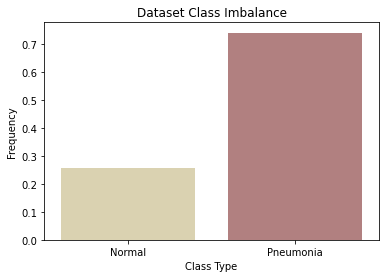

In [18]:
plot_class_imbalances(normal_size, pneumo_size, "Dataset")

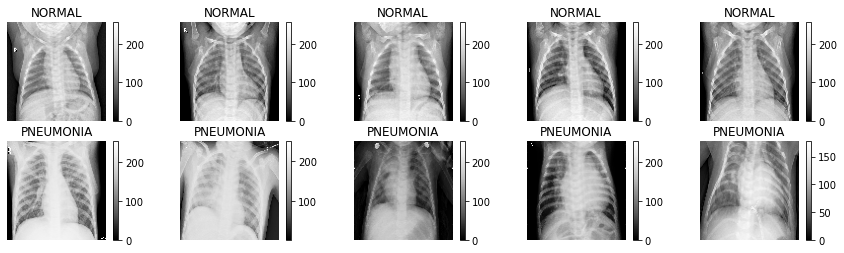

In [19]:
# plotting 5 of each class 
fig = plt.figure(figsize = (15,4))
for i in range(10):
    if i < 5:
        filepath = f'{data_normal_dir}/{select_norm[i-3]}'
        label = 'NORMAL'
    else:
        filepath = f'{data_pneumonia_dir}/{select_pneu[i-8]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(2, 5, i+1)
    
    # to plot without rescaling, remove target_size
    filename = image.load_img(filepath, target_size = (100,100), color_mode='grayscale')
    plt.imshow(filename, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
    plt.colorbar()
# # plt.savefig("5normal_5pnuemo.png" ,bbox_inches='tight')    
plt.show()

In [20]:
# normal_imgs

In [21]:
# pneumonia_imgs

In [22]:
# compare viral to bacterial pnuemonia
viral = []
bacterial = []
for x in pneumonia_imgs:
    if x.split()[0][0] == 'V':
        viral.append(x)
    else:
        bacterial.append(x)
        

In [23]:
# bacterial

In [24]:
# viral

In [25]:
# making n X m matrix
def img_to_np_array(path, list_of_fns, size = (64, 64)):
    # iterating through each file
    for file_n in list_of_fns:
        file_p = path + '/' + file_n
        current_image = image.load_img(file_p, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # flatten image to a 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_matrix = np.concatenate((full_matrix, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_matrix = img_ts
    return full_matrix

# run it on our folders
normal_img_array = img_to_np_array(data_normal_dir, normal_imgs)
pneumonia_img_array = img_to_np_array(data_pneumonia_dir, pneumonia_imgs)

In [36]:
# comparing viral to bacterial pnuemonia
viral_img_array = img_to_np_array(data_pneumonia_dir, viral)
bacterial_img_array = img_to_np_array(data_pneumonia_dir, bacterial)

In [26]:
# normal_images

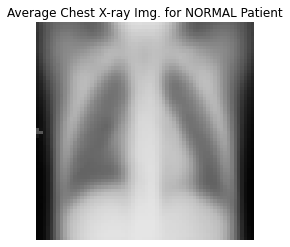

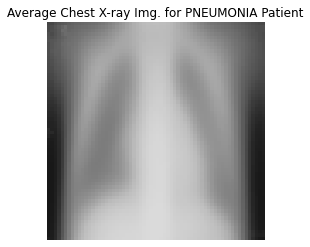

In [27]:
def find_mean_img(full_matrix, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_matrix, axis = 0) 
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average Chest X-ray Img. for {title} Patient')
    plt.axis('off')
#     plt.savefig(f"./../../images/average{title}.png" ,bbox_inches='tight')
    plt.show()
    return mean_img

norm_mean = find_mean_img(normal_img_array, 'NORMAL')
pneu_mean = find_mean_img(pneumonia_img_array, 'PNEUMONIA')

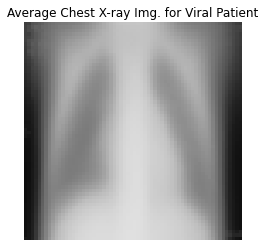

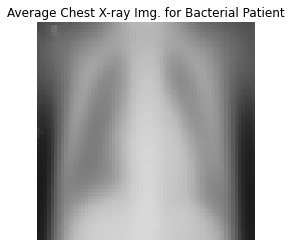

In [40]:
viral_mean = find_mean_img(viral_img_array, 'Viral')
bacterial_mean = find_mean_img(bacterial_img_array, 'Bacterial')

In [57]:
def plot_graph_difference(img_mean_1, img_mean_2, img1, img2):
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20, 5))

    contrast_mean = img_mean_1 - img_mean_2
    ax[0].imshow(contrast_mean, cmap='coolwarm')
    ax[0].set_title(f'Difference Between Bacterial & Viral Pneumonia Average')
    ax[0].axis('off')

    # visualize pixel instensity distributions
    img_arr_2 = img_mean_2.ravel()
    img_arr_1 = img_mean_1.ravel()


    # Create a dataframe
    img1_img2 = pd.DataFrame([(img_arr_2),(img_arr_1)]).T
    img1_img2.columns = [f'{img2}', '{img1}']


    sns.boxplot(data=img1_img2, ax=ax[1], palette = 'coolwarm');
    ax[1].set_title(f"Distribution of pixel intensity \n between {img2} and {img1} Patient chest X-rays", size=14);

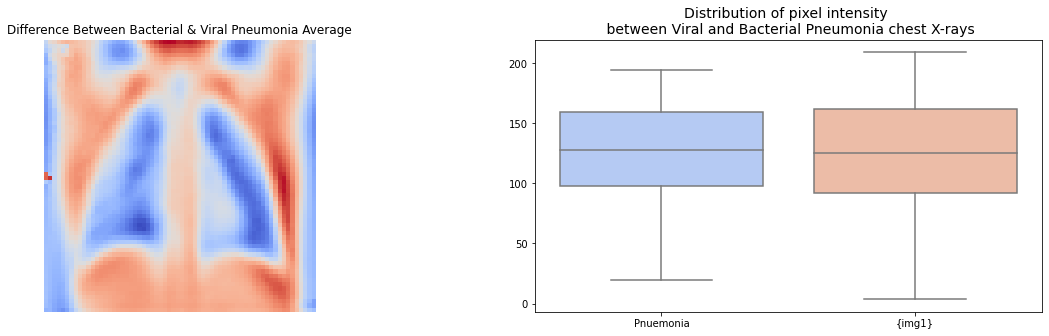

In [58]:
plot_graph_difference(norm_mean, pneu_mean, 'Normal', 'Pnuemonia')

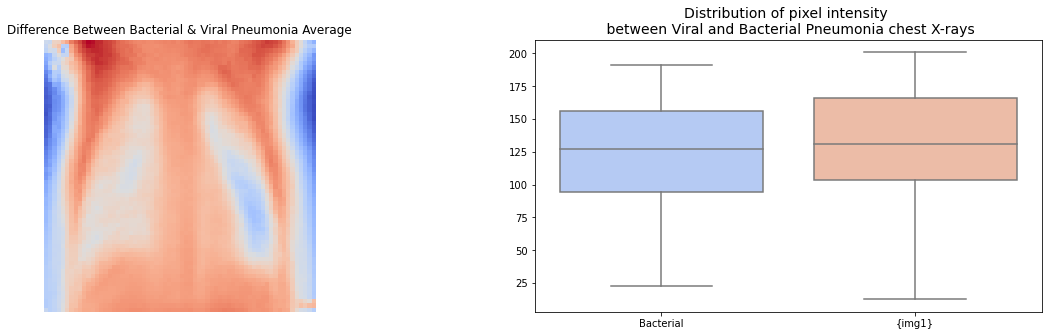

In [59]:
plot_graph_difference(viral_mean, bacterial_mean, 'Viral', 'Bacterial')

# Model

In [29]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.


In [30]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 37 images belonging to 2 classes.
Found 1094 images belonging to 2 classes.
Found 4101 images belonging to 2 classes.


In [31]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [32]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 37
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (37, 64, 64, 3)
test_labels shape: (37, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


In [33]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(37, 12288)
(200, 12288)


In [34]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

ValueError: cannot reshape array of size 37 into shape (180,1)

In [ ]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

In [ ]:
results_train = model.evaluate(train_img, train_y)

In [ ]:
results_test = model.evaluate(test_img, test_y)

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

In [ ]:
results_train = model.evaluate(train_images, train_y)

In [ ]:
results_test = model.evaluate(test_images, test_y)

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [ ]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [ ]:
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

In [ ]:
test_x, test_y = next(test_generator)

In [ ]:
results_test = model.evaluate(test_x, test_y)

In [ ]:
results_test